## Building our first neural network with `non-linearity`

### Using make classification data and get it ready

In [72]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [73]:
len(x), len(y)

(1000, 1000)

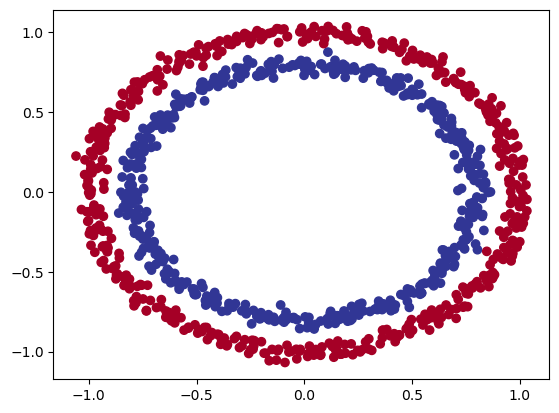

In [74]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu);

In [75]:
import torch
from torch import nn

In [76]:
type(x)

numpy.ndarray

In [ ]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [78]:
type(x), type(y)

(torch.Tensor, torch.Tensor)

In [79]:
from sklearn.model_selection import train_test_split


X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(X_train[5])

tensor([-0.8837, -0.4678])


### What is non-linear function

* A nonlinear function is a function whose graph is not a straight line, meaning it exhibits curves or varied shapes rather than a constant slope


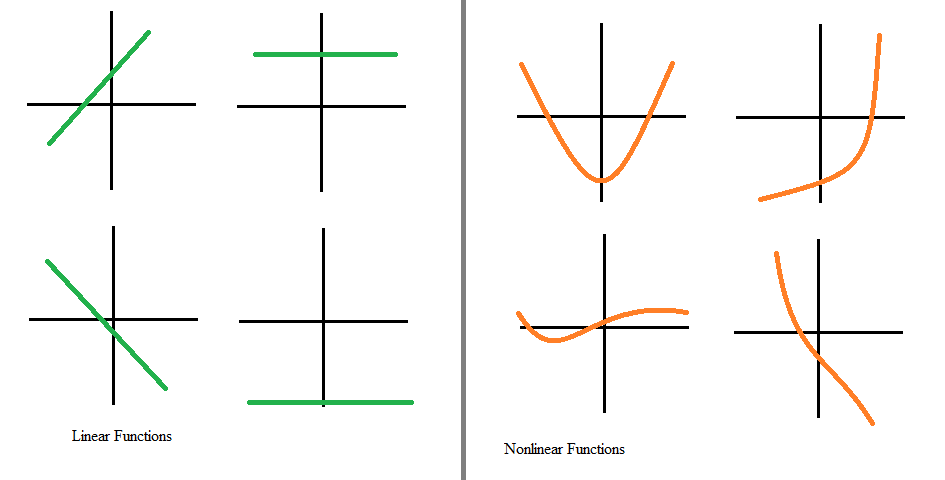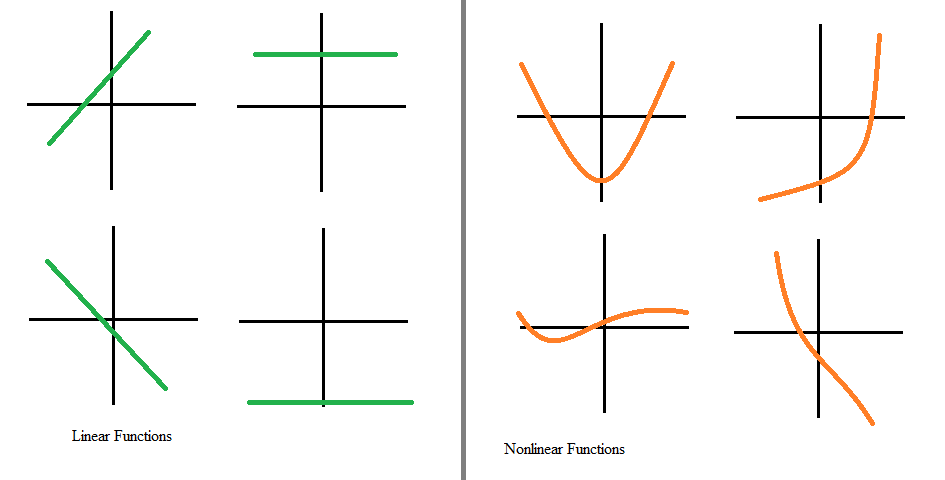

* Linear = Straight linear
* Non-linear = non-straight lines (curve)

  Relu fucntions = $f(x) = max(0, x)$


    # Create a ReLU function with PyTorch
    relu_pytorch = nn.ReLU()
    
    # Apply your ReLU function on x, and calculate Gradients
    x = torch.tensor(-1.0, requires_grad=True)
    y = relu_pytorch(x)
    y.backward()
    
    # Print the gradient of the ReLU function for x
    gradient = x.grad
    print(gradient)



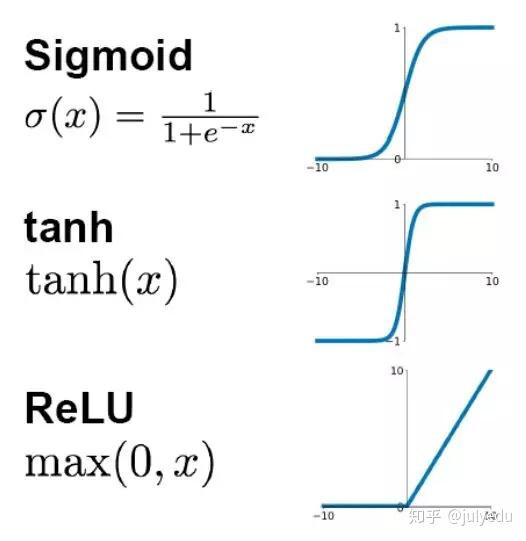

In [80]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device



'cuda'

In [81]:
class circlemodel(nn.Module):
    def __init__(self): 
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))



model = circlemodel().to(device)
model        

circlemodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### Calculate accuracy

In [85]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [83]:
#setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put in the data in device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    #1 
    model.train()

    #2 logits
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #3 calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_pred, y_pred=y_pred)

    # 4
    optimizer.zero_grad()
    # 5
    loss.backward()

    optimizer.step()


    model.eval()

    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = test_pred, y_pred = test_pred)
        print(test_pred, test_logits, test_acc, test_loss)

    if epoch % 100 == 0:
        print(f"epoch : {epoch} | Loss : {loss:.4f}, Acc : {acc:.2f}% | Test Loss : {test_loss:.4f}, Test Acc : {test_acc:.2f}%")

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.], device='cuda:0') tensor([ 11.0800,  -5.7005,  10.1089, -11.6247,   4.4868,   2.4605, -10.3720,
        